In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
def automatic_white_balance(image):
    r_max = np.max(image[:, :, 0])
    g_max = np.max(image[:, :, 1])
    b_max = np.max(image[:, :, 2])
    
    alpha = g_max/r_max
    beta = g_max/b_max
    
    r_channel = image[:, :, 0] * alpha
    g_channel = image[:, :, 1]
    b_channel = image[:, :, 2] * beta
    
    balanced_image = np.stack((r_channel, g_channel, b_channel), axis=-1)
    
    return np.clip(balanced_image, 0, 255).astype(np.uint8)

In [ ]:
def gray_world_white_balance(image):
    r_avg = np.mean(image[:, :, 0])
    g_avg = np.mean(image[:, :, 1])
    b_avg = np.mean(image[:, :, 2])
    
    alpha = g_avg/r_avg
    beta = g_avg/b_avg
    
    r_channel = image[:, :, 0] * alpha
    g_channel = image[:, :, 1]
    b_channel = image[:, :, 2] * beta
    
    balanced_image = np.stack((r_channel, g_channel, b_channel), axis=-1)
    
    return np.clip(balanced_image, 0, 255).astype(np.uint8)

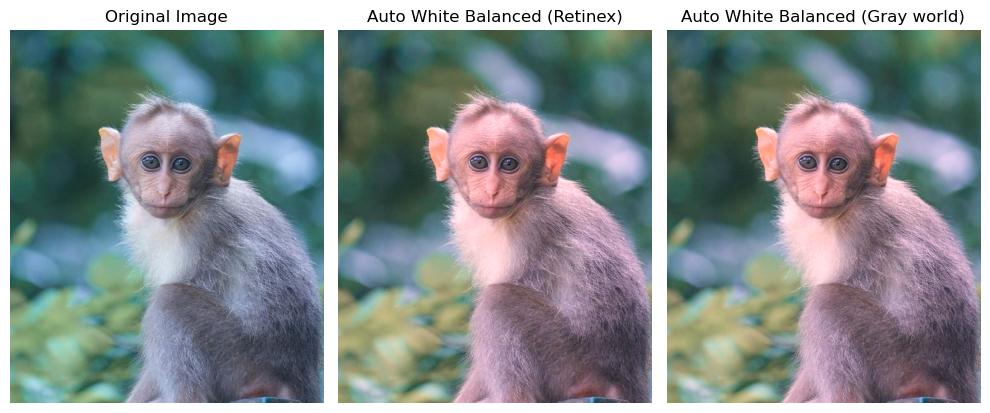

In [29]:
# Load the image
image_path = 'KOTHIWB2.jpg'
image = np.array(Image.open(image_path))

# Apply automatic white balancing
balanced_image = automatic_white_balance(image)

# Apply gray world white balancing
balanced_image = gray_world_white_balance(image)

# Plot the original and balanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(balanced_image)
plt.title('Auto White Balanced (Retinex)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(balanced_image)
plt.title('Auto White Balanced (Gray world)')
plt.axis('off')


plt.tight_layout()
plt.show()
